<a href="https://colab.research.google.com/github/Alejix/DataScience/blob/main/Tecnicas_Agrupamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodología Asum - DM

Metodología 3: ASUM-DM (LA QUE VAMOS A USAR)

1. Describir - BI
2. Reducir - Aprendizaje no supervisado
3. Agrupar - Aprendizaje no supervisado
4. Clasificar - Aprendizaje supervisado
5. Pronostica - Aprendizaje supervisado

Etapas de entendimiento:
Comprensión del negocio: Definir el problema, los objetivos, y los requisitos de la solución empresarial.
Enfoque analítico: Expresar el problema bajo el contexto de la estadística y la IA. Definir el método de construcción.

Etapas de preparación:
Requisitos de datos: Determinar los contenidos de datos, formatos y representaciones. Definir de manera clara el insumo de datos.
Recopilación de datos: Reunir los recursos relevantes para la solución del problema. Definir los mecanismos para capturar dichos insumos.
Comprensión de datos: Conocer el estado actual del insumo. Implementa herramientas estadísticas descriptivas para descubrir los elementos iniciales de los datos.

Etapas de ejecución:
Preparación de datos: Construir el conjuntos de datos para el modelo. Implementar mecanismos para mejorar la capacidad predictora de las variables.
Modelado: Identificar la mejor técnica de modelado. Determinar un esquema de desempeño para decidir el mejor método aplicado.
Evaluación: Buscar interpretar la calidad del componente entregado bajo mecanismos gráficos y numéricos.

Etapas de cierre:
Implementación: Implementar el modelo en ambientes de producción.
Retroalimentación: Determinar la efectividad futura del modelo y sus posibles modificaciones en soporte.

# Enunciado

Ustedes hacen parte del equipo de análisis de la información de una empresa de retail. La organización está implementando una nueva aplicación que según el equipo de diseño está en capacidad de atraer una mayor cantidad de usuarios, siempre y cuando se establezcan medidas de comunicación y promoción diferencial dependiendo del tipo de cliente. Ustedes deciden entonces implementar un modelo de datos que les permita diferenciar los clientes según su comportamiento actual.

El conjunto de datos cuenta con el siguiente diccionario:
-	ID: identificador del cliente en la fuente de datos
-	Year_Birth: Año de nacimiento del cliente
-	Education: Nivel de educación del cliente
-	Marital_Status: Estado civil del cliente
-	Income: Ingresos anuales reportados por el cliente
-	Kidhome: Cantidad de niños pequeños que tiene el cliente
-	Teenhome: Cantidad de jóvenes que tiene el cliente
-	Dt_Customer: Fecha en la que el cliente hizo su primera compra
-	Recency: Número de días desde la última compra
-	MntWines: Monto gastado en vinos en los últimos dos años
-	MntFruits: Monto gastado en frutas en los últimos dos años
-	MntMeatProducts: Monto gastado en productos de carne en los últimos dos años
-	MntFishProducts: Monto gastado en productos de pescado en los últimos dos años
-	MntSweetProducts: Monto gastado en dulces en los últimos dos años
-	MntGoldProds: Monto gastado en artículos de oro en los últimos dos años
-	NumDealsPurchases: Número de compras efectuadas con descuento
-	NumWebPurchases: Número de compras realizadas por página web
-	NumCatalogPurchases: Número de compras hechas por catálogo
-	NumStorePurchases: Número de compras realizadas directamente en tiendas
-	NumWebVisitMonth: Promedio de visitas a la página en un mes durante los últimos dos años
-	AcceptedCmp1: Aceptación de oferta en la primera campaña (1 – SI, 0 – NO)
-	AcceptedCmp2: Aceptación de oferta en la segunda campaña (1 – SI, 0 – NO)
-	AcceptedCmp3: Aceptación de oferta en la tercera campaña (1 – SI, 0 – NO)
-	AcceptedCmp4: Aceptación de oferta en la cuarta campaña (1 – SI, 0 – NO)
-	AcceptedCmp5: Aceptación de oferta en la quinta campaña (1 – SI, 0 – NO)
-	Response: Aceptación de oferta en la última campaña (1 – SI, 0 – NO)
-	Complain: Indica si el cliente se ha quejado (1 – SI, 0 – NO)
-	Z_CostContact: Costo de contactar al cliente
-	Z_Revenue: Utilidad después de aceptar una campaña de mercadeo

Implemente los pasos metodológicos de ASUM – DM que le permita desarrollar de forma efectiva el proyecto de datos.



# PIP

In [ ]:
#! pip install yellowbrick

# Librerías

In [ ]:
#TRATAMIENTO DE DATOS
import pandas as pd
import numpy as np
import math

#GRÁFICOS
import matplotlib.pyplot as plt
import seaborn as sb
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px

#PREPARACIÓN DE DATOS
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config

#MODELADO
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering #Clustering = Agrupamiento
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product

#EVALUACIÓN
from sklearn.metrics import silhouette_score

#ADVERTENCIAS
import warnings
warnings.filterwarnings('ignore')

# Cargar los datos

In [ ]:
datos = pd.read_csv('datos_caso_1.csv', sep=';')
datos.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
datos.info() #Columnas de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Se observan datos nulos en ingreso.
Se elimina la variable ID ya que no tienen ninguna importancia para el modelo.

In [ ]:
datos.describe() #Descripción de variables númericas

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### ¿Desviación estandar = 0.00?
Si la desviación estándar es 0 en las variables "Z_CostContact" y "Z_Revenue" significa que todos los valores son iguales (3 y 11 respectivamente), por lo tanto no hay información relevante para el modelo de clasificación.

In [ ]:
datos.describe(include='object') #Descripción de variables categoricas

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,2012-08-31
freq,1127,864,12


# Analisis gráfico univarado

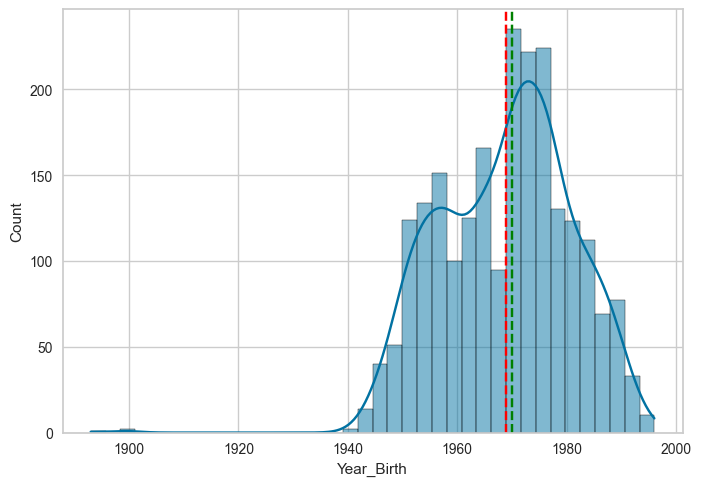

In [ ]:
sb.histplot(data= datos, x= 'Year_Birth', kde= True)
plt.axvline(x= datos.Year_Birth.mean(), color = 'red', linestyle= 'dashed')
plt.axvline(x= datos.Year_Birth.median(), color = 'green', linestyle= 'dashed')
plt.show()

### ¿Datos de 1900?
Al observar los datos atípicos en Year_Birth, se procede a eliminarlos
Hay datos atipicos en 1900 debido a que los null se transforman en este año.

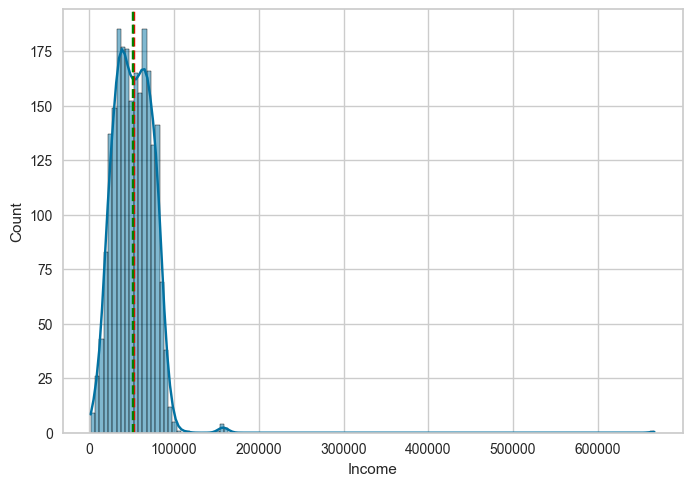

In [ ]:
sb.histplot(data= datos, x= 'Income', kde= True)
plt.axvline(x= datos.Income.mean(), color = 'red', linestyle= 'dashed')
plt.axvline(x= datos.Income.median(), color = 'green', linestyle= 'dashed')
plt.show()

Decidimos imputar los datos nulos con la media ya que la hipótesis de normalidad dice que se asume normalidad cuando hay más de 1000 individuos y la gráfica lo respalda.

In [ ]:
# Se seleccionan solo las variable numéricas interesantes para cada tipo de gráfica
numerical = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Kidhome','Teenhome']
tortas = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain']

# Se crea una lista con las posibles coordenadas para generar las gráficas
cords = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2],[2,0],[2,1],[2,2],[3,0],[3,1],[3,2],[4,0],[4,1],[4,2]]
cords2 = [[0,0],[0,1],[0,2],[0,3],[0,4],[1,0],[1,1],[1,2],[1,3],[1,4],[2,0],[2,1],[2,2],[2,3],[2,4],[3,0],[3,1],[3,2],[3,3],[3,4],[4,0],[4,1],[4,2],[4,3],[4,4],[5,0],[5,1],[5,2],[5,3],[5,4]]

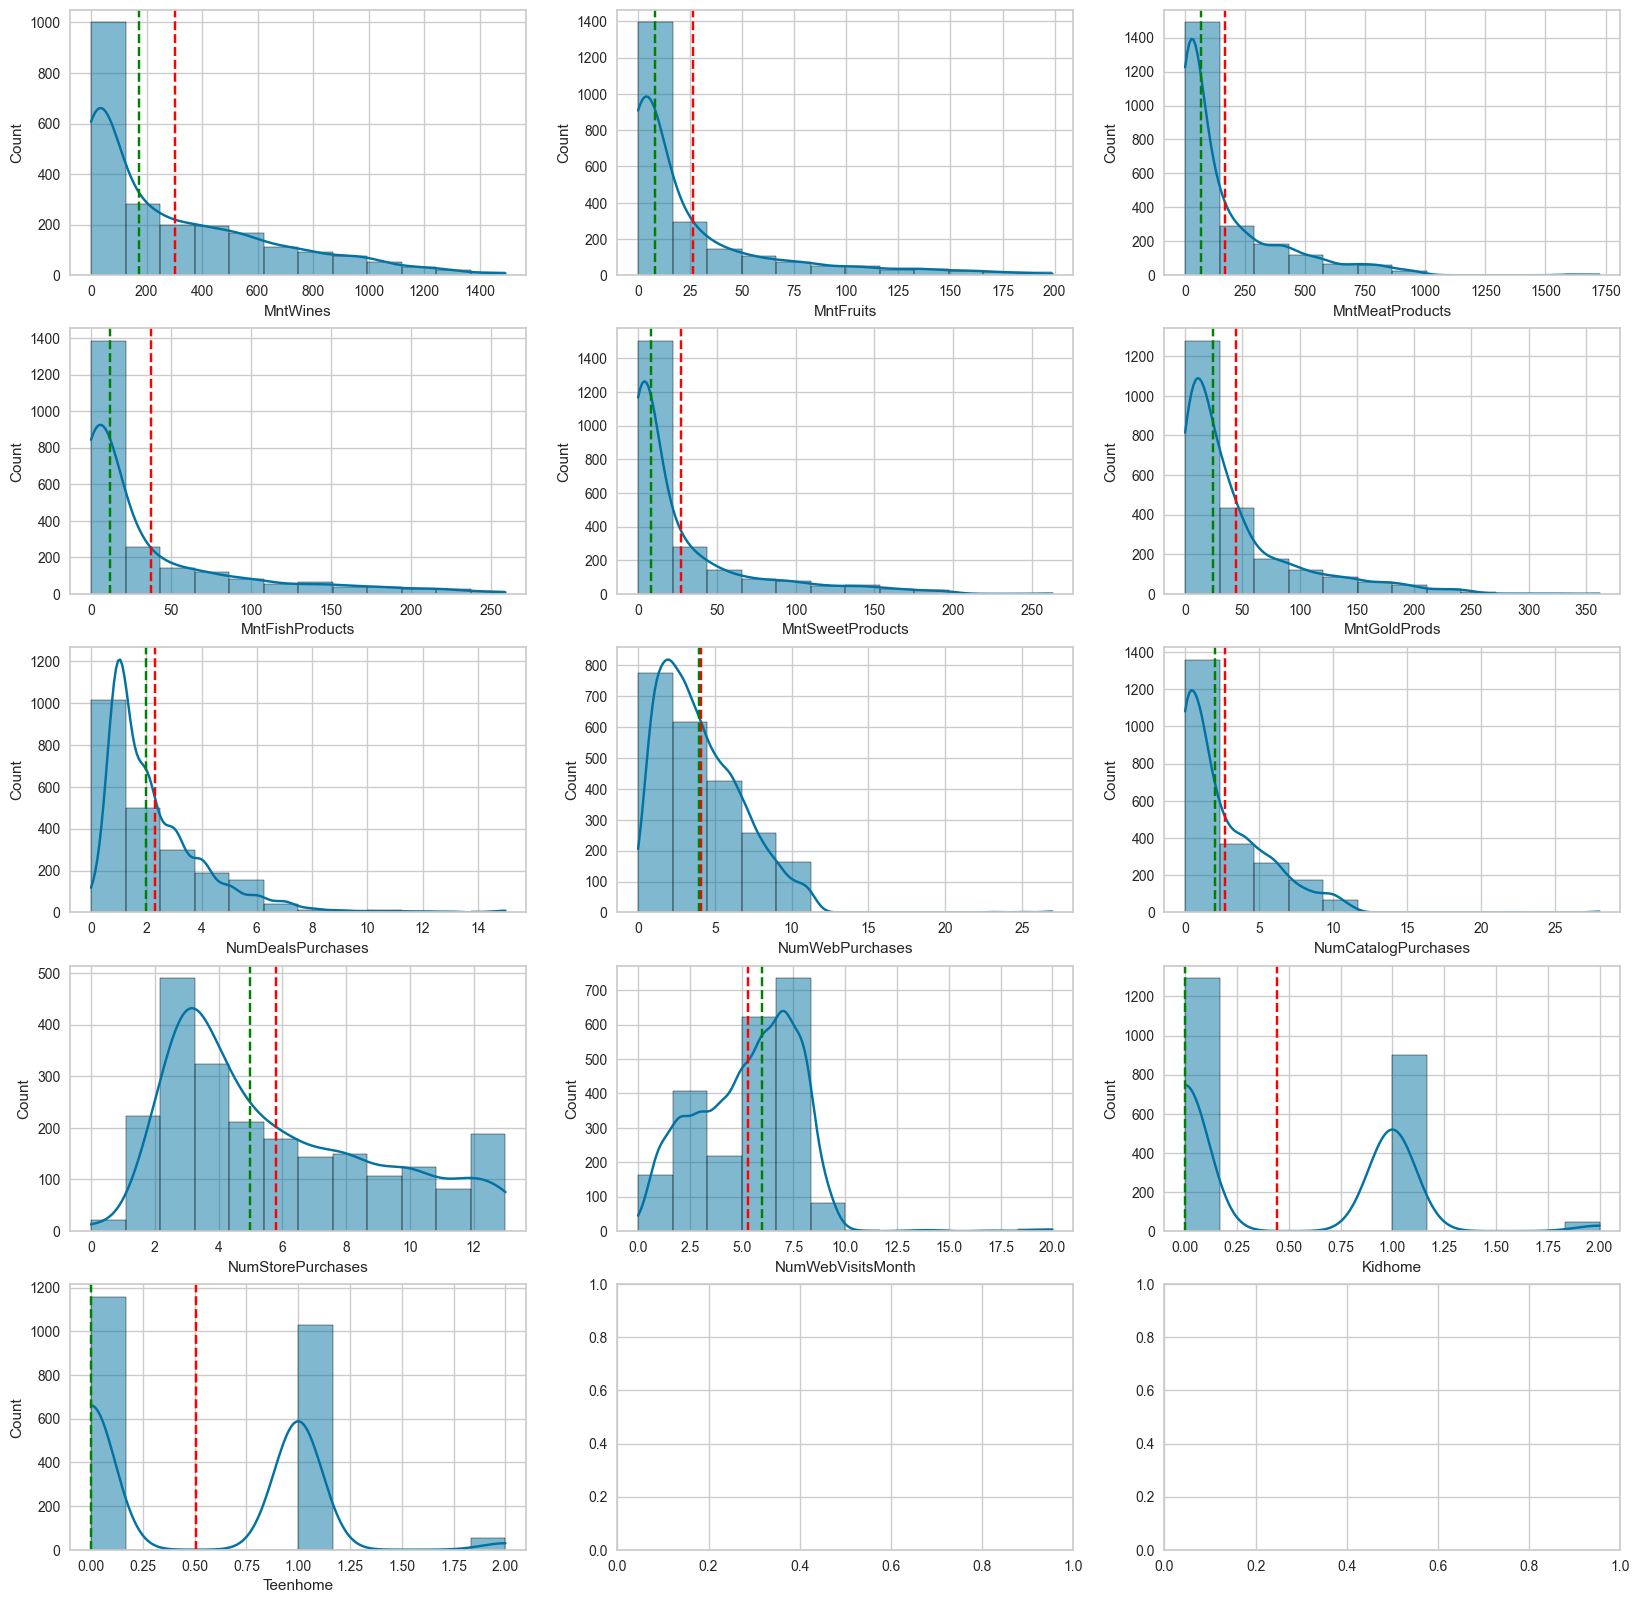

In [ ]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))
for i in range(len(numerical)):
    sb.histplot(data=datos, x=numerical[i], kde=True, bins = int(1+3.3*math.log10(len(datos))), ax=ax[cords[i][0],cords[i][1]] )#Fórmula de Sturges
    ax[cords[i][0], cords[i][1]].axvline(x=datos[numerical[i]].mean(), color='red', linestyle='dashed')
    ax[cords[i][0], cords[i][1]].axvline(x=datos[numerical[i]].median(), color='green', linestyle='dashed')
plt.show()

Se puede observar que las variables Kidhome y Teenhome sólo tienen 3 valores posibles, por lo que se pueden convertir a variables categóricas.

In [ ]:
# converir a string las variables Kidhome y Teenhome
datos['Kidhome'] = datos['Kidhome'].astype('str')
datos['Teenhome'] = datos['Teenhome'].astype('str')

In [ ]:
#Eliminamos este codigo porque los graficos de torta nos dicen lo necesario.
'''fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for i in range (len(tortas)):
    sb.countplot(data=datos, x=tortas[i], ax=ax[cords[i][0],cords[i][1]])
plt.show()'''

'fig, ax = plt.subplots(3, 3, figsize=(20, 20))\nfor i in range (len(tortas)):\n    sb.countplot(data=datos, x=tortas[i], ax=ax[cords[i][0],cords[i][1]])\nplt.show()'

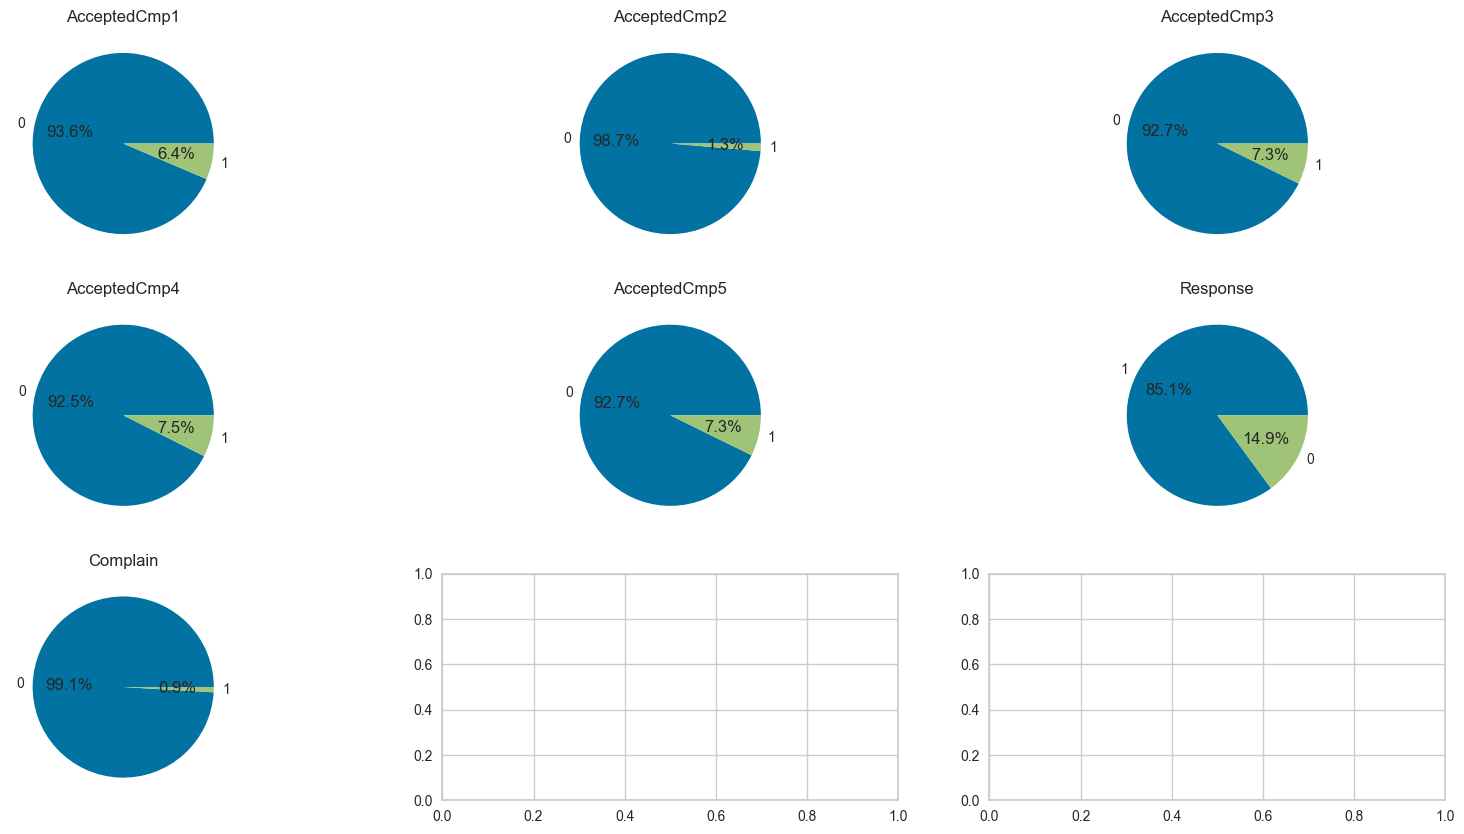

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
for i in range (len(tortas)):
    ax[cords[i][0],cords[i][1]].pie(datos[tortas[i]].value_counts(), labels=datos[tortas[i]].unique(), autopct='%0.1f%%')
    ax[cords[i][0],cords[i][1]].set_title(tortas[i])
plt.show()

### Eliminación de las variables desbalanceadas
En las variables categóricas, para el balanceo de los datos, si una variable supera el 80% de las
muestras esta variable puede ser omitida.

En este caso, se puede concluir que hay una aceptación positiva general entre la población,
por lo que estas variables no son necesarias para nuestro agrupamiento



# Variables Categóricas

In [ ]:
#Hacer una lista con las variables categoricas
categorical = datos.select_dtypes(include=['object']).columns.to_list()

Ploteamos las variables categoricas con la lista

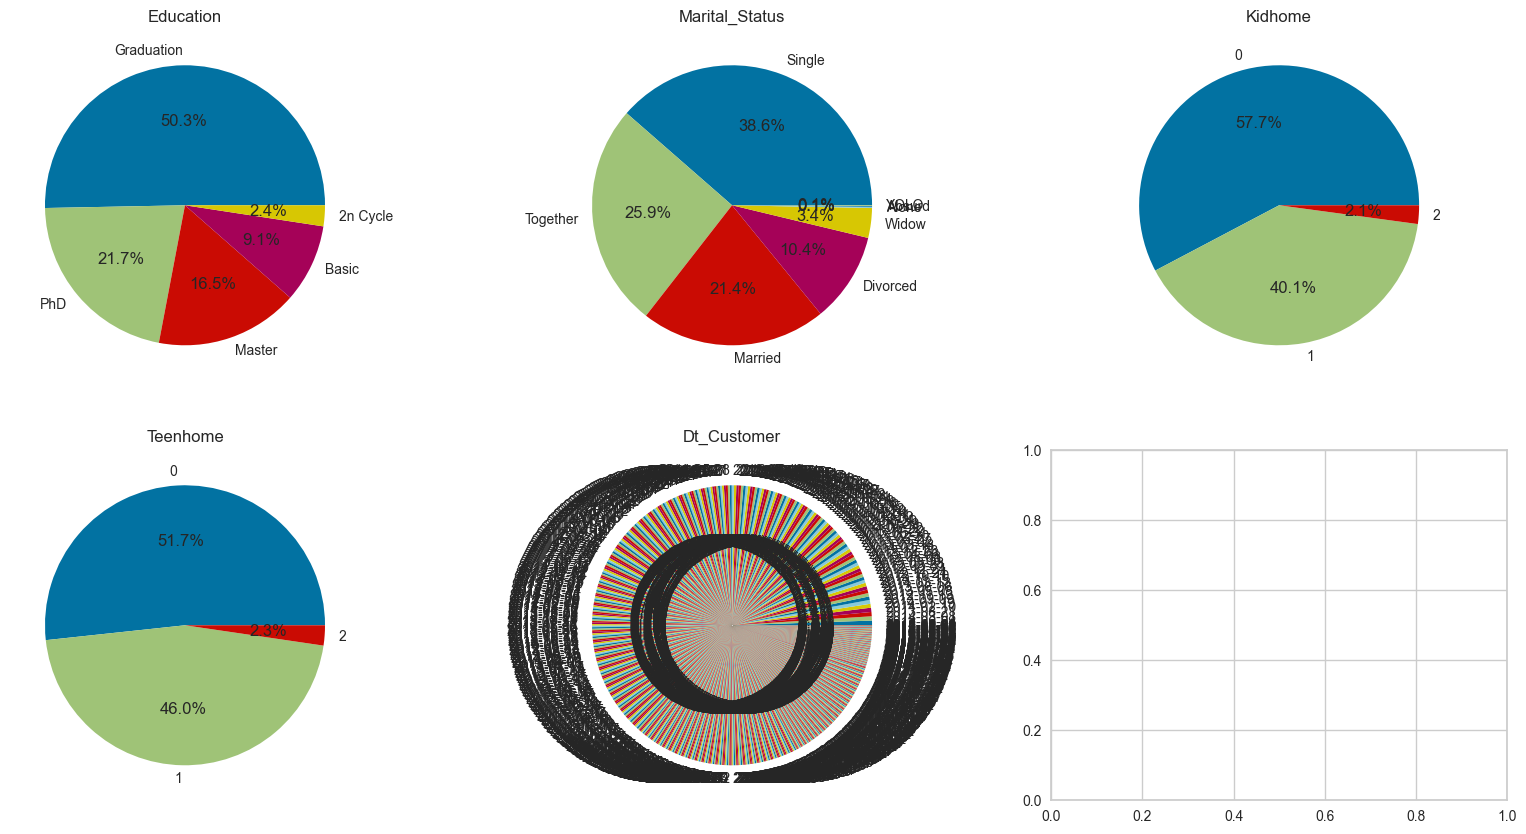

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20, 10))
for i in range (len(categorical)):
    ax[cords[i][0],cords[i][1]].pie(datos[categorical[i]].value_counts(), labels=datos[categorical[i]].unique(), autopct='%0.1f%%')
    ax[cords[i][0],cords[i][1]].set_title(categorical[i])
plt.show()

# Correlaciones

In [ ]:
# plt.figure(figsize=(20,20))
# sb.heatmap(datos.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Blues')
# plt.show()

'''Correlaciones interesantes: mntmeatproducts con numcatalogpurchases 0.72
#Vamos a plotear todo lo que tenga una correlación superior a 0.45, para analizar
#todos los tipos de correlaciones '''

'Correlaciones interesantes: mntmeatproducts con numcatalogpurchases 0.72\n#Vamos a plotear todo lo que tenga una correlación superior a 0.45, para analizar\n#todos los tipos de correlaciones '

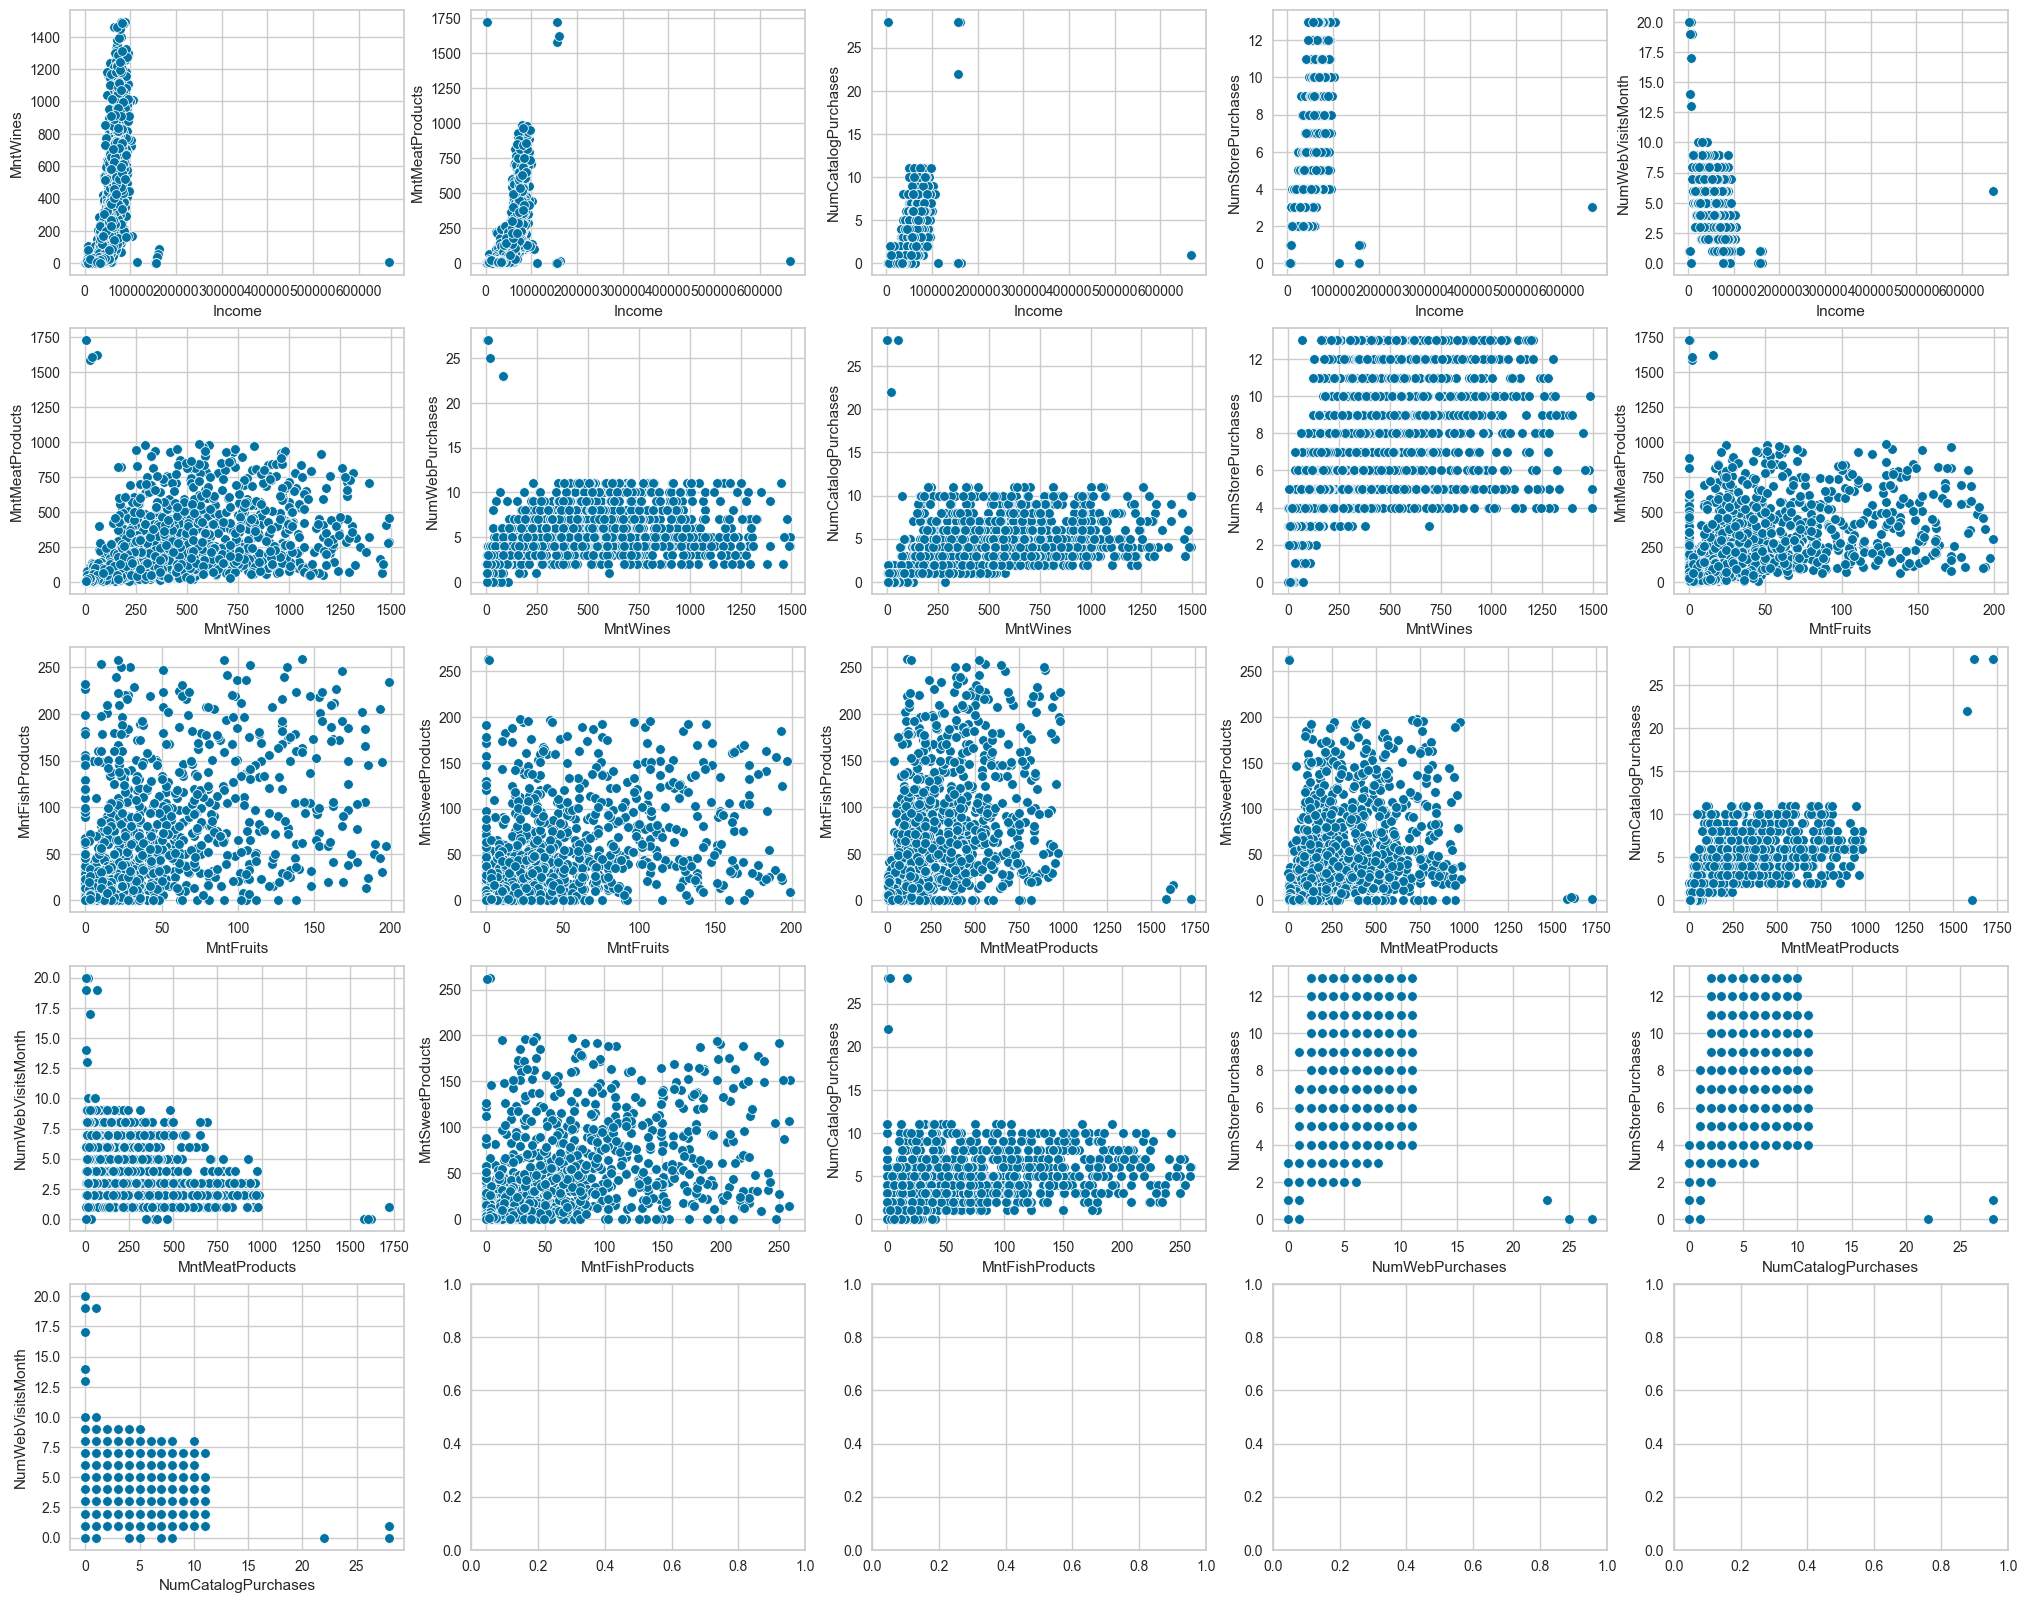

In [ ]:
correlation_matrix = datos.corr(numeric_only=True)

# Filtrar las correlaciones que cumplen el criterio
high_correlations = correlation_matrix[((correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)) & (correlation_matrix != 1.0)]
# Obtener las coordenadas de los pares de variables con alta correlación
pairs_to_plot = []
for col in high_correlations.columns:
    correlated_vars = high_correlations.index[high_correlations[col].notnull()].tolist()
    for var in correlated_vars:
        pairs_to_plot.append([col, var])


# Crear los gráficos de dispersión para los pares de variables
fig, ax = plt.subplots(5, 5, figsize=(25, 20))
repetidos = []
pos=0
for i in range(len(pairs_to_plot)):
    #plt.title(f'Scatter Plot: {var1} vs {var2}')
    if not (pairs_to_plot[i] in repetidos):
        sb.scatterplot(data=datos, x=pairs_to_plot[i][0], y=pairs_to_plot[i][1], ax=ax[cords2[pos][0],cords2[pos][1]])
        repetidos.append([pairs_to_plot[i][1],pairs_to_plot[i][0]])
        pos+=1
plt.show()



Dear JuanSe: Que no se note la imputación lineal de datos que hubo antes de entregarnos estos datos

## Cajas Y Bigotes


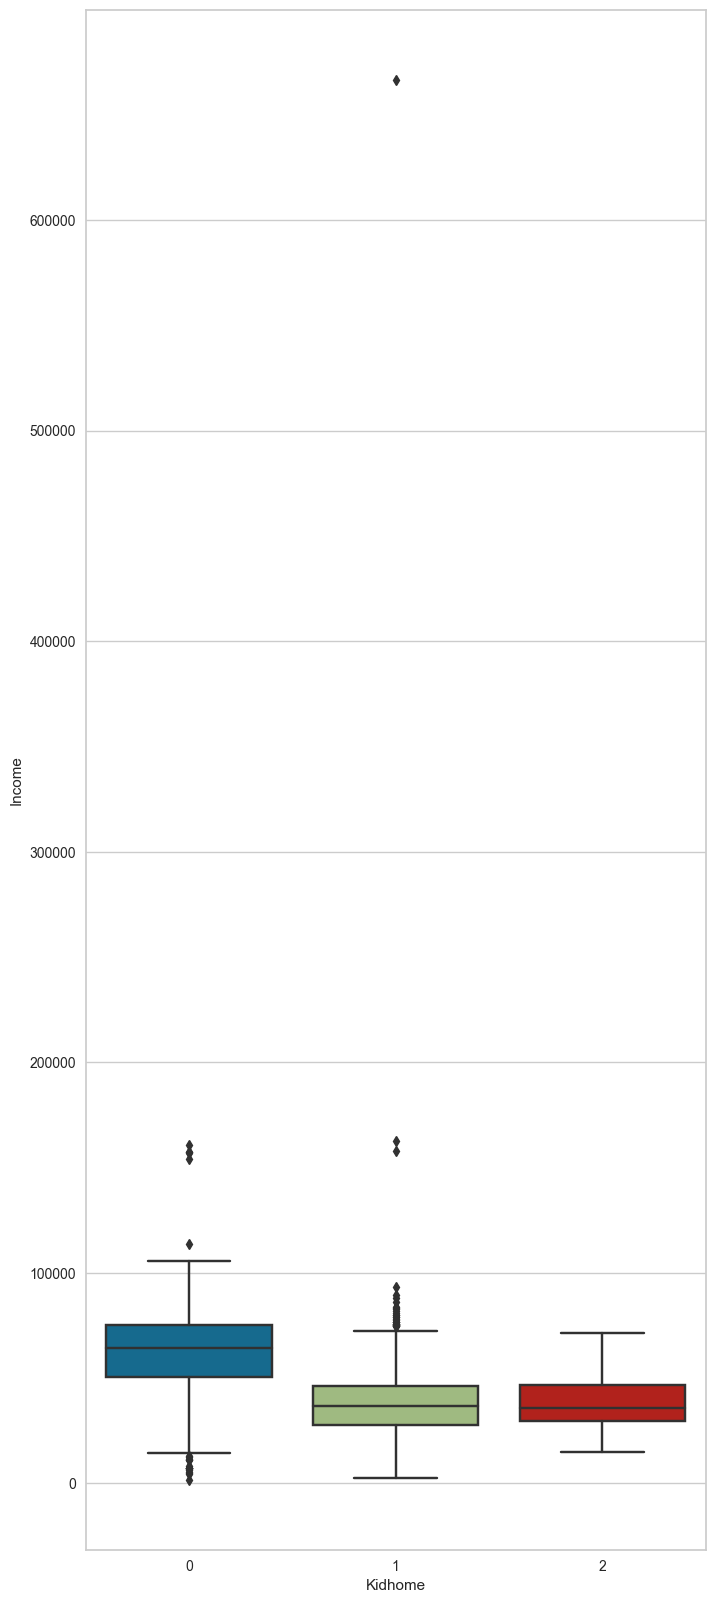

In [ ]:
fig, ax = plt.subplots(figsize=(8, 20))
sb.boxplot(data=datos, x='Kidhome', y='Income')
plt.show()

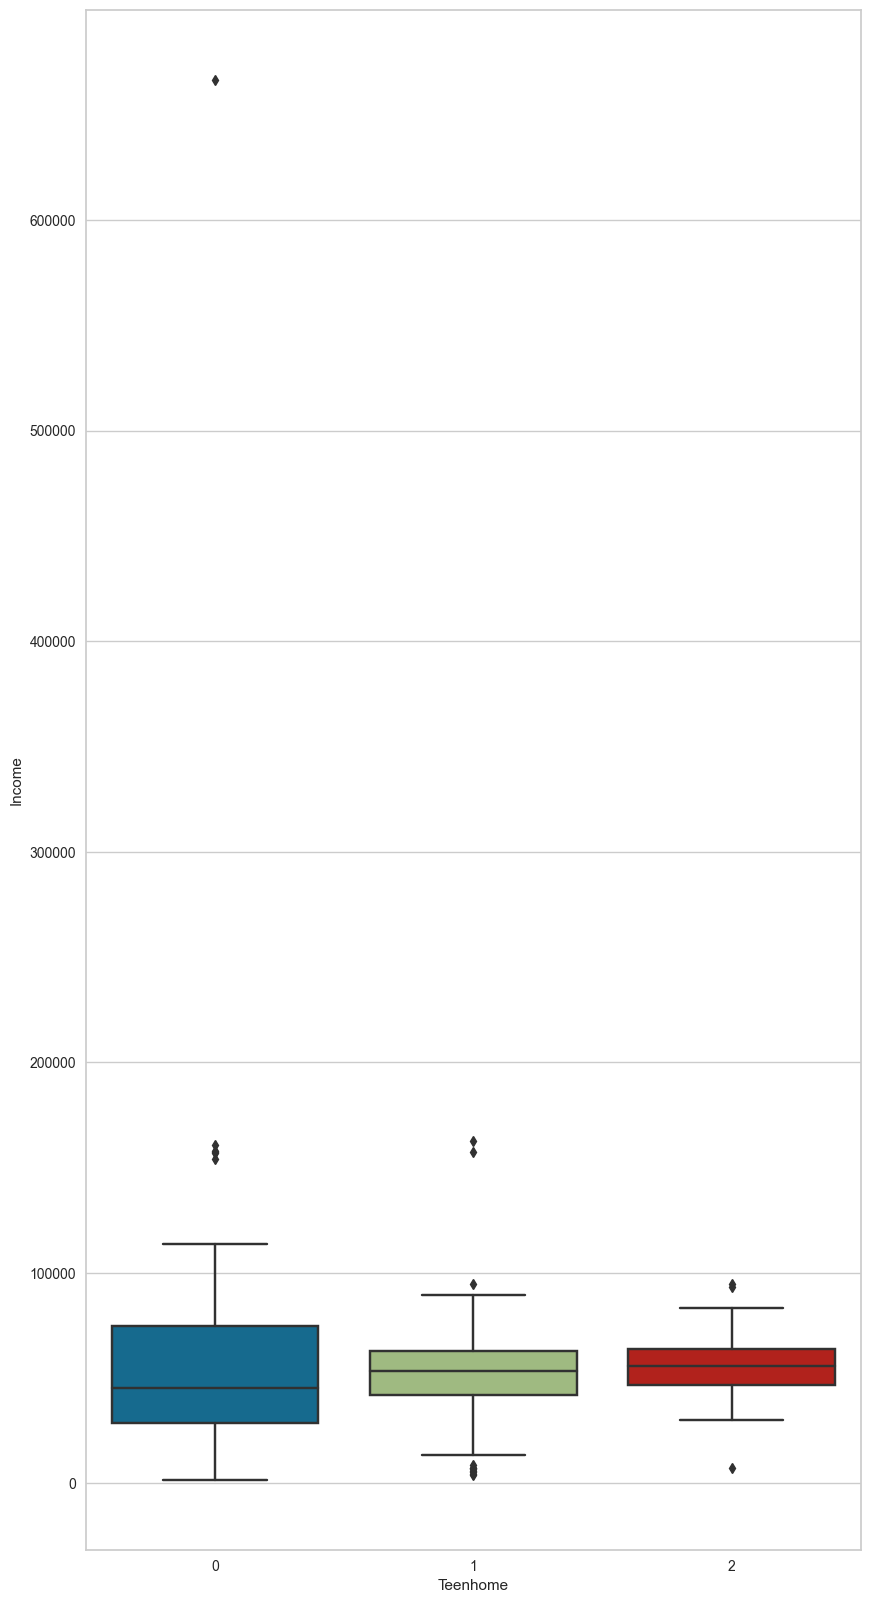

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))
sb.boxplot(data=datos, x='Teenhome', y='Income')
plt.show()

# Eliminación de variables innecesarias

- Se elimina la variable ID ya que no tienen ninguna importancia para el modelo
- Se eliminan "Z_CostContact" y "Z_Revenue"
- Se eliminan los datos atípicos de "Year_Birth"
- Vemos datos nulos en el income. Decidimos imputarlos
- Se eliminan todas las variables de aceptación
- Se elimina la variable "Dt_Customer"

In [ ]:
# Eliminación de variables
variablesEliminar = ['ID', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Dt_Customer']
for i in variablesEliminar:
    datos = datos.drop(i, axis = 1)
# Eliminación de los registros con year_birth <= 1900
datos = datos[datos['Year_Birth'] > 1900]
# Imputación con la media en la variable Income
datos['Income'] = datos['Income'].fillna(datos['Income'].mean())

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2237 non-null   int64  
 1   Education            2237 non-null   object 
 2   Marital_Status       2237 non-null   object 
 3   Income               2237 non-null   float64
 4   Kidhome              2237 non-null   object 
 5   Teenhome             2237 non-null   object 
 6   Recency              2237 non-null   int64  
 7   MntWines             2237 non-null   int64  
 8   MntFruits            2237 non-null   int64  
 9   MntMeatProducts      2237 non-null   int64  
 10  MntFishProducts      2237 non-null   int64  
 11  MntSweetProducts     2237 non-null   int64  
 12  MntGoldProds         2237 non-null   int64  
 13  NumDealsPurchases    2237 non-null   int64  
 14  NumWebPurchases      2237 non-null   int64  
 15  NumCatalogPurchases  2237 non-null   int64 

# Preparación de los datos

In [ ]:
# Separación de variables por tipo
numCols = datos.select_dtypes(include= ['float64', 'int64']).columns.to_list()
catCols = datos.select_dtypes(include= ['object']).columns.to_list()

# Crear las transformaciones de variables
numTransformer = Pipeline(steps = [('scaler', StandardScaler())])
#Escogemos StandarScaler debido al comportamiento normal de nuestras variables númericas.
catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])
#Escogemos OneHotEncoder debido a que nuestras variables categoricas no cuentan con mas de 10 clases.

# Diseñar el transformador de columnas
preprocessor = ColumnTransformer(transformers = [
    ('num', numTransformer, numCols),
    ('cat', catTransformer, catCols)
], remainder = 'passthrough')

set_config(display = 'diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Year_Birth', 'Income', 'Recency', 'MntWines',
                                  'MntFruits', 'MntMeatProducts',
                                  'MntFishProducts', 'MntSweetProducts',
                                  'MntGoldProds', 'NumDealsPurchases',
                                  'NumWebPurchases', 'NumCatalogPurchases',
                                  'NumStorePurchases', 'NumWebVisitsMonth']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Education', 'Marital_Status', 'Kidhome',
                                  'Teenhome'])])

In [ ]:
print(numCols)

['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


In [ ]:
print(catCols)

['Education', 'Marital_Status', 'Kidhome', 'Teenhome']


In [ ]:
datosPre = preprocessor.fit_transform(datos)
codCat = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(catCols)
print(codCat)

['Education_2n Cycle' 'Education_Basic' 'Education_Graduation'
 'Education_Master' 'Education_PhD' 'Marital_Status_Absurd'
 'Marital_Status_Alone' 'Marital_Status_Divorced' 'Marital_Status_Married'
 'Marital_Status_Single' 'Marital_Status_Together' 'Marital_Status_Widow'
 'Marital_Status_YOLO' 'Kidhome_0' 'Kidhome_1' 'Kidhome_2' 'Teenhome_0'
 'Teenhome_1' 'Teenhome_2']


In [ ]:
labels = np.concatenate((numCols, codCat))
datosPro = pd.DataFrame(datosPre, columns=labels)
datosPro.head(10)

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Kidhome_0,Kidhome_1,Kidhome_2,Teenhome_0,Teenhome_1,Teenhome_2
0,-1.017296,0.235703,0.307272,0.983671,1.554623,1.680253,2.461700,1.475877,0.846061,0.348371,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.273722,-0.235350,-0.383584,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,-0.729569,-0.169096,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.333495,0.773895,-0.798098,0.362570,0.572430,-0.176928,1.345050,-0.147000,-0.037829,-0.686563,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.290534,-1.022090,-0.798098,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,-0.748784,-0.169096,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.034108,0.241894,1.550812,-0.389289,0.421324,-0.216820,0.155177,-0.001667,-0.556634,1.383304,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,-0.162544,0.410441,-1.143525,0.641917,0.396140,-0.305468,-0.686886,0.361663,-0.575849,-0.169096,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,0.179357,0.135733,-0.521755,-0.205039,0.975381,-0.012929,0.228400,0.531217,-0.326054,0.865837,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,1.376009,-0.750178,-0.590841,-0.677552,-0.409762,-0.491629,-0.631969,-0.631440,-0.402914,-0.169096,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0.435782,-0.874112,-1.039897,-0.861802,-0.661606,-0.633467,-0.631969,-0.582996,-0.806429,-0.686563,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,-1.615622,-1.860751,0.652700,-0.820197,-0.661606,-0.713250,-0.668581,-0.631440,-0.595064,-0.686563,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Modelado

## KMeans

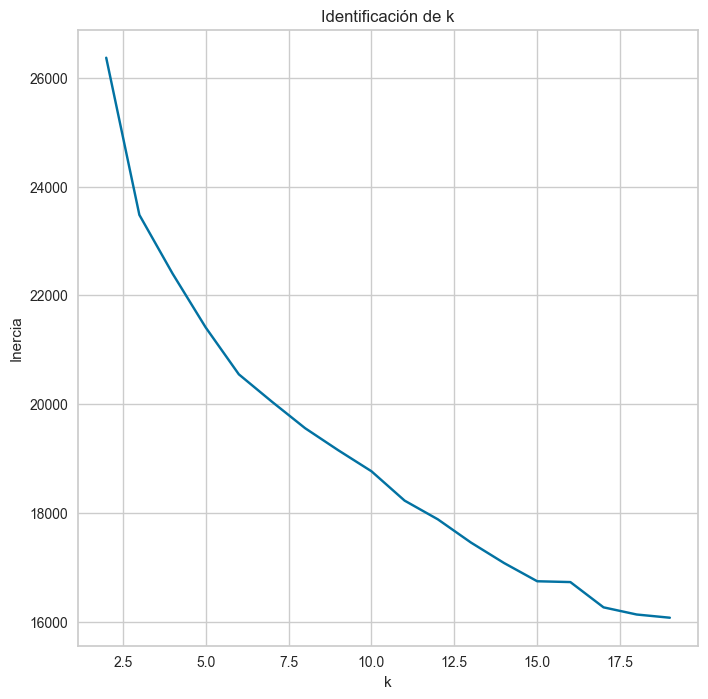

In [ ]:
# Método del codo (inercia)
sumDistancia = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(datosPro)
    sumDistancia.append(km.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, sumDistancia, 'bx-')
plt.title('Identificación de k')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.show()


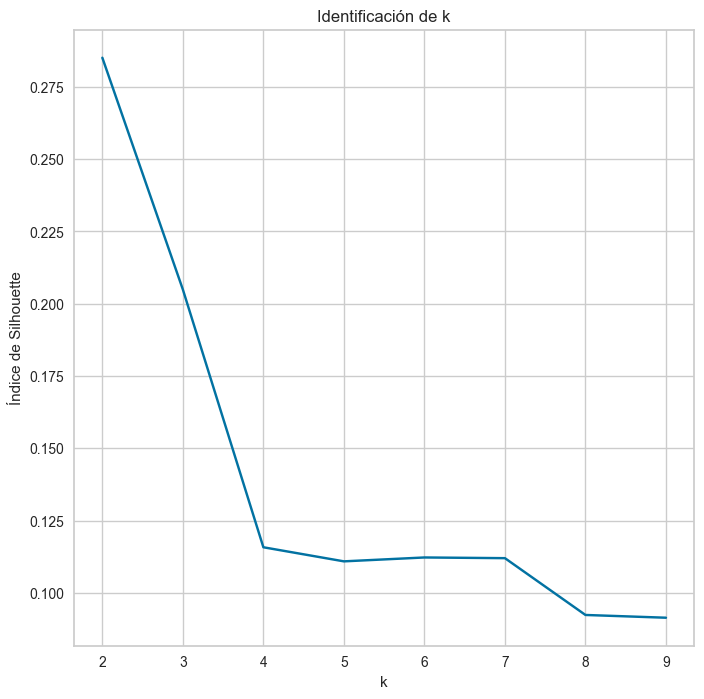

In [ ]:
numeroCluster = range(2,10)
valoresIndice = []

for n_cluster in numeroCluster:
    modeloKmeans = KMeans(n_clusters=n_cluster, random_state=123)
    labels = modeloKmeans.fit_predict(datosPro)
    mediaSilhouette = silhouette_score(datosPro, labels)
    valoresIndice.append(mediaSilhouette)

plt.figure(figsize= (8,8))
plt.plot(numeroCluster, valoresIndice, 'bx-')
plt.title('Identificación de k')
plt.xlabel('k')
plt.ylabel('Índice de Silhouette')
plt.show()

Tomamos la decisión de escoger entre 2, 4 o 6 grupos ya que aunque el índice de Silhouette nos sugiere 2 grupos, el cambio en el valor de la inercia en el método del codo nos sugiere que la distancia que separa los individuos podría reducirse mucho más si se escogieran 4 o 6 grupos.

In [ ]:
modelo_final_KM_2G = KMeans(n_clusters=2, random_state=123, n_init = 25)
modelo_final_KM_2G.fit(datosPro)
grupos2G = modelo_final_KM_2G.predict(datosPro)
datosGrupos = datos
datosGrupos['Grupo KMeans 2G'] = grupos2G

In [ ]:
datosGrupos['Grupo KMeans 2G'].value_counts()

Grupo KMeans 2G
1    1337
0     900
Name: count, dtype: int64

In [ ]:
modelo_final_KM_4G = KMeans(n_clusters=4, random_state=123, n_init = 25)
modelo_final_KM_4G.fit(datosPro)
grupos4G = modelo_final_KM_4G.predict(datosPro)
datosGrupos['Grupo KMeans 4G'] = grupos4G

In [ ]:
centros = pd.DataFrame(modelo_final_KM_4G.cluster_centers_)
centros.columns = np.concatenate([numCols, codCat])
centros

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Kidhome_0,Kidhome_1,Kidhome_2,Teenhome_0,Teenhome_1,Teenhome_2
0,-0.325948,0.291508,-0.038716,0.652208,-0.092665,-0.084023,-0.124257,-0.087907,0.403943,0.754885,...,0.165766,0.239640,0.043243,3.603604e-03,0.767568,0.219820,0.012613,0.169369,0.780180,0.050450
1,-0.018483,0.978185,0.027773,0.834100,1.116794,1.302750,1.180781,1.107566,0.648204,-0.516499,...,0.242531,0.263620,0.043937,2.168404e-18,0.964851,0.033392,0.001757,0.818981,0.173989,0.007030
2,0.848110,-0.910800,-0.031102,-0.815964,-0.513958,-0.631516,-0.525454,-0.509605,-0.532412,-0.211004,...,0.264085,0.237676,0.005282,1.951564e-18,0.146127,0.827465,0.026408,0.933099,0.061620,0.005282
3,-0.532675,-0.368880,0.042845,-0.684608,-0.535961,-0.616388,-0.558612,-0.535708,-0.533223,-0.009584,...,0.181651,0.295413,0.045872,1.951564e-18,0.427523,0.526606,0.045872,0.121101,0.847706,0.031193


In [ ]:
datosGrupos['Grupo KMeans 4G'].value_counts()

Grupo KMeans 4G
1    569
2    568
0    555
3    545
Name: count, dtype: int64

In [ ]:
numInverseTransformer = preprocessor.named_transformers_['num']['scaler']
centNumInvTrans = numInverseTransformer.inverse_transform(centros[numCols])
catInverseTransformer = preprocessor.named_transformers_['cat']['onehot']
centCatInvTrans = catInverseTransformer.inverse_transform(centros[codCat])

In [ ]:
centros_transformados = pd.DataFrame(np.concatenate([centNumInvTrans, centCatInvTrans], axis = 1),
                                     columns = np.concatenate([numCols, catCols]))
centros_transformados

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education,Marital_Status,Kidhome,Teenhome
0,1965.088288,59535.217852,47.983784,523.463063,22.590991,147.96036,30.735135,23.43964,64.990991,3.785586,6.63964,3.300901,7.994595,5.787387,Graduation,Married,0,1
1,1968.685413,76727.905957,49.908612,584.669596,70.615114,460.831283,102.026362,72.794376,77.702988,1.328647,5.172232,6.017575,8.388401,2.778559,Graduation,Married,0,0
2,1978.823944,29432.41181,48.204225,29.424296,5.862676,24.440141,8.818662,6.02993,16.260563,1.919014,2.15669,0.464789,3.033451,7.072183,Graduation,Married,1,0
3,1962.669725,43000.731472,50.344954,73.625688,4.988991,27.853211,7.007339,4.952294,16.218349,2.308257,2.366972,0.8,3.722936,5.66789,Graduation,Married,1,1


In [ ]:
modelo_final_KM_6G = KMeans(n_clusters=6, random_state=123, n_init = 25)
modelo_final_KM_6G.fit(datosPro)
grupos = modelo_final_KM_6G.predict(datosPro)
datosGrupos['Grupo KMeans 6G'] = grupos

In [ ]:
datosGrupos['Grupo KMeans 6G'].value_counts()

Grupo KMeans 6G
5    553
4    498
2    440
3    298
1    245
0    203
Name: count, dtype: int64

## Agrupamiento Jerárquico

In [ ]:
def dibujarDendrograma(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
cluster_ward = AgglomerativeClustering(affinity = 'euclidean',
                                       linkage = 'ward',
                                       n_clusters = None,
                                       distance_threshold = 0)
cluster_ward.fit(datosPro)

AgglomerativeClustering(affinity='euclidean', distance_threshold=0,
                        n_clusters=None)

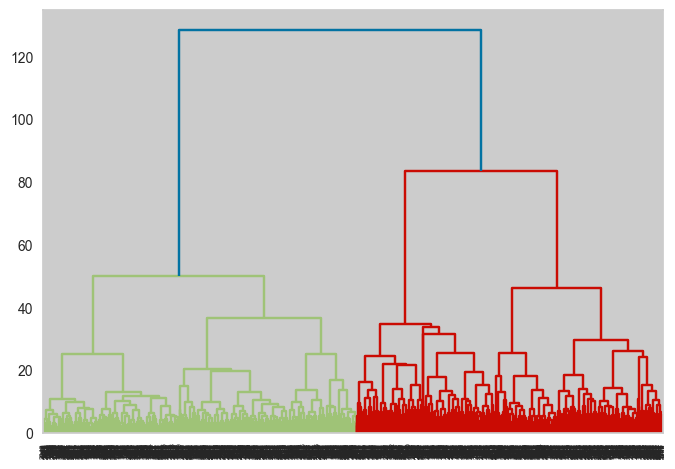

In [ ]:
dibujarDendrograma(cluster_ward)
plt.show()

In [ ]:
modelo_final_jerarquico = AgglomerativeClustering(affinity = 'euclidean',
                                                  linkage = 'ward',
                                                  n_clusters = 2)

modelo_final_jerarquico.fit(datosPro)
labels = modelo_final_jerarquico.labels_
datosGrupos['Grupo Jerárquico'] = labels
datosGrupos

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Grupo KMeans 2G,Grupo KMeans 4G,Grupo KMeans 6G,Grupo Jerárquico,Grupo DBSCAN
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,3,8,10,4,7,0,1,1,0,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,1,1,2,5,1,3,4,1,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,1,8,2,10,4,0,0,2,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,2,2,0,4,6,1,2,5,1,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,5,3,6,5,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,2,9,3,4,5,0,0,2,0,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,8,2,5,7,1,0,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,1,2,3,13,6,0,0,2,0,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,2,6,5,10,3,0,0,2,0,0


In [ ]:
datosGrupos['Grupo Jerárquico'].value_counts()

Grupo Jerárquico
1    1132
0    1105
Name: count, dtype: int64

## DBSCAN

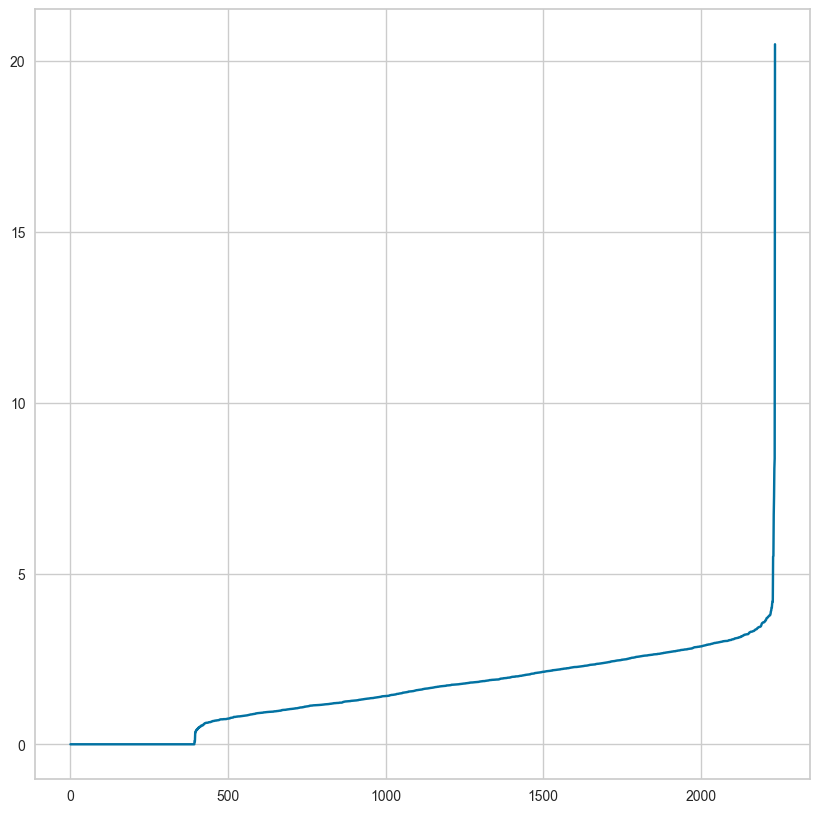

In [ ]:
# Identificar el rango de distancias para epsilon
neighbors = NearestNeighbors(n_neighbors = 7)
neighbors_fit = neighbors.fit(datosPro)
distances, indice = neighbors_fit.kneighbors(datosPro)
distances = np.sort(distances, axis = 0)
distances = distances[ :,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

In [ ]:
valores_epsilon = np.arange(2, 5, 0.2)
min_muestras = np.arange(2, 8)
params = list(product(valores_epsilon, min_muestras))
sil_score = []
for p in params:
    y_pred = DBSCAN(eps = p[0], min_samples=p[1]).fit_predict(datosPro)
    sil_score.append(silhouette_score(datosPro, y_pred))

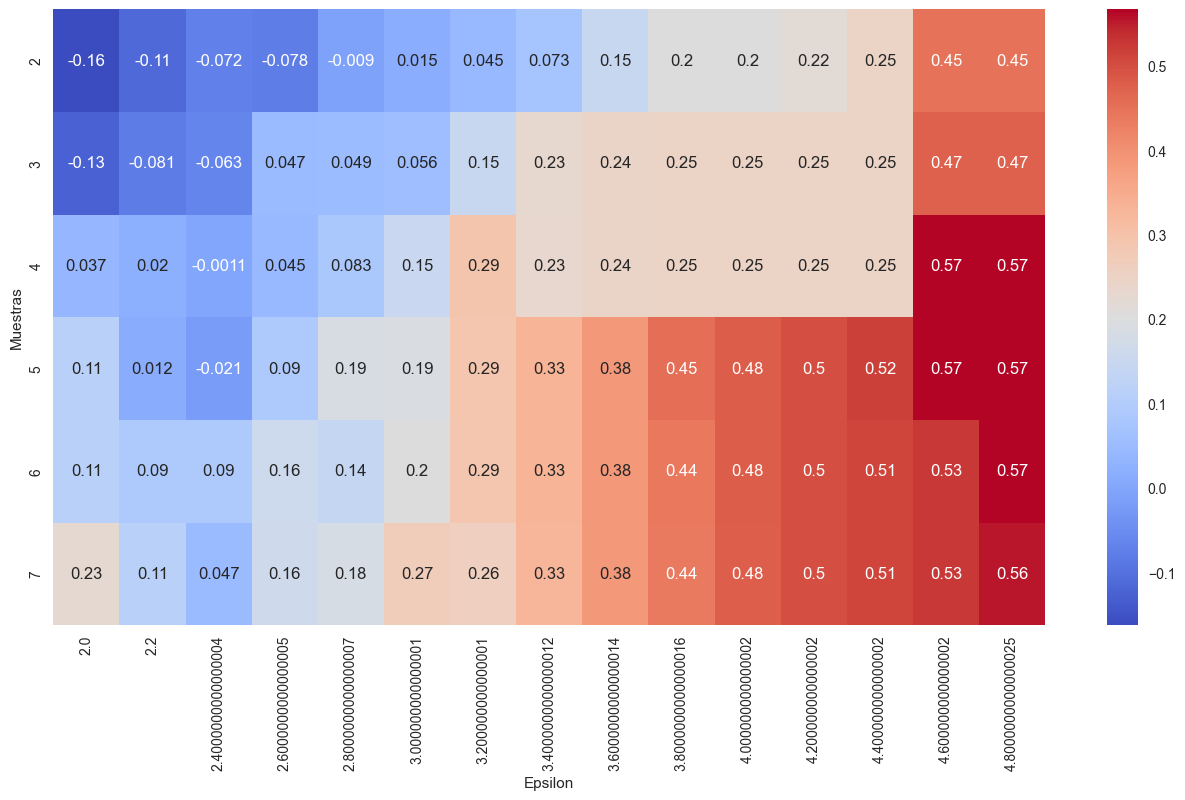

In [ ]:
df_ajuste_parametros = pd.DataFrame.from_records(params, columns = ['Epsilon', 'Muestras'])
df_ajuste_parametros['Score'] = sil_score
datos_cruzados = pd.pivot_table(df_ajuste_parametros, values= 'Score', index= 'Muestras', columns='Epsilon')
plt.figure(figsize=(16,8))
sb.heatmap(datos_cruzados, annot=True, fmt = '.2g', cmap= 'coolwarm')
plt.show()

In [ ]:
modelo_final_dbscan = DBSCAN(eps=3.5, min_samples=5)
grupos = modelo_final_dbscan.fit_predict(datosPro)
datosGrupos['Grupo DBSCAN'] = grupos
datosGrupos

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Grupo KMeans 2G,Grupo KMeans 4G,Grupo KMeans 6G,Grupo Jerárquico,Grupo DBSCAN
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,3,8,10,4,7,0,1,1,0,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,1,1,2,5,1,3,4,1,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,1,8,2,10,4,0,0,2,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,2,2,0,4,6,1,2,5,1,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,5,3,6,5,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,2,9,3,4,5,0,0,2,0,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,8,2,5,7,1,0,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,1,2,3,13,6,0,0,2,0,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,2,6,5,10,3,0,0,2,0,0


In [ ]:
datosGrupos['Grupo DBSCAN'].value_counts()

Grupo DBSCAN
 0    2172
-1      65
Name: count, dtype: int64

Observando los resultados del metodo DBSCAN, podemos concluir que sugiere solo un grupo de clientes, con valores atipicos de cllientes que no logro ajustar a este grupo. Queda descartado este metodo, ya que no estariamos cumpliendo con agrupar a los clientes en grupos de acuerdo a sus caracteristicas.

In [ ]:
indice_KM_2G = silhouette_score(datosPro, modelo_final_KM_2G.predict(datosPro))
indice_KM_4G = silhouette_score(datosPro, modelo_final_KM_4G.predict(datosPro))
indice_KM_6G = silhouette_score(datosPro, modelo_final_KM_6G.predict(datosPro))
indice_jerarquico = silhouette_score(datosPro, modelo_final_jerarquico.fit_predict(datosPro))
indice_dbscan = silhouette_score(datosPro, modelo_final_dbscan.fit_predict(datosPro))

In [ ]:
print(f'El índice de Silhouette para el método KMeans (2 grupos) es: {indice_KM_2G}')
print(f'El índice de Silhouette para el método KMeans (4 grupos) es: {indice_KM_4G}')
print(f'El índice de Silhouette para el método KMeans (6 grupos) es: {indice_KM_6G}')
print(f'El índice de Silhouette para el método Jerárquico es: {indice_jerarquico}')
print(f'El índice de Silhouette para el método DBSCAN es: {indice_dbscan}')

El índice de Silhouette para el método KMeans (2 grupos) es: 0.2850932861568004
El índice de Silhouette para el método KMeans (4 grupos) es: 0.11574070226026051
El índice de Silhouette para el método KMeans (6 grupos) es: 0.11213868726963536
El índice de Silhouette para el método Jerárquico es: 0.21762232450707195
El índice de Silhouette para el método DBSCAN es: 0.355706565654945


La conclusión, según el índice de Silhouette, es que el número óptimo de clusters es solo 1, esto no tiene sentido con la logica de negocio. El resultado obtenido mediante los metodos KMeans y agrupamiento jerárquico sugiere una mejor solucion, que seria dividir a los clientes en dos grandes grupos. Entre estos dos modelos, el que mejor se ajusta a los datos es el de KMeans.